In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [97]:
# load the dataset

df = pd.read_excel('Supply chain logisitcs problem.xlsx')

In [98]:
# how many rows and columns are there in the dataset

df.shape

(9215, 14)

In [99]:
# checking how many columns there are

df.keys()

Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')

In [100]:
# checking the first 5 rows

df.head()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.30
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.94
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.20
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.16
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.34


In [101]:
# checking the last 5 columns

df.tail()

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
9210,1.447305e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9211,1.447319e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118
9212,1.447322e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,245,0.294265
9213,1.447145e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683430,PLANT03,PORT09,278,2.480000
9214,1.447328e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683424,PLANT03,PORT09,317,1.960000


In [102]:
# checking the data types of the columns

df.dtypes

Order ID                       float64
Order Date              datetime64[ns]
Origin Port                     object
Carrier                         object
TPT                              int64
Service Level                   object
Ship ahead day count             int64
Ship Late Day count              int64
Customer                        object
Product ID                       int64
Plant Code                      object
Destination Port                object
Unit quantity                    int64
Weight                         float64
dtype: object

In [103]:
# count the number of items per column

df.count()

Order ID                9215
Order Date              9215
Origin Port             9215
Carrier                 9215
TPT                     9215
Service Level           9215
Ship ahead day count    9215
Ship Late Day count     9215
Customer                9215
Product ID              9215
Plant Code              9215
Destination Port        9215
Unit quantity           9215
Weight                  9215
dtype: int64

In [104]:
# more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order ID              9215 non-null   float64       
 1   Order Date            9215 non-null   datetime64[ns]
 2   Origin Port           9215 non-null   object        
 3   Carrier               9215 non-null   object        
 4   TPT                   9215 non-null   int64         
 5   Service Level         9215 non-null   object        
 6   Ship ahead day count  9215 non-null   int64         
 7   Ship Late Day count   9215 non-null   int64         
 8   Customer              9215 non-null   object        
 9   Product ID            9215 non-null   int64         
 10  Plant Code            9215 non-null   object        
 11  Destination Port      9215 non-null   object        
 12  Unit quantity         9215 non-null   int64         
 13  Weight            

In [105]:
# Let's replace the empty strings with NaN values

df = df.replace(' ', np.nan)

In [106]:
# Let's replace the question marks (?) with NaN values

df = df.replace('?', np.nan)

In [107]:
# determine the number of unique categories in each variable: The output of the preceding code shows the number of distinct categories per variable, that is, the cardinality:

df.nunique()

Order ID                9215
Order Date                 1
Origin Port                3
Carrier                    3
TPT                        5
Service Level              3
Ship ahead day count       5
Ship Late Day count        4
Customer                  46
Product ID               772
Plant Code                 7
Destination Port           1
Unit quantity           2624
Weight                  5899
dtype: int64

Text(0.5, 1.0, 'Cardinality')

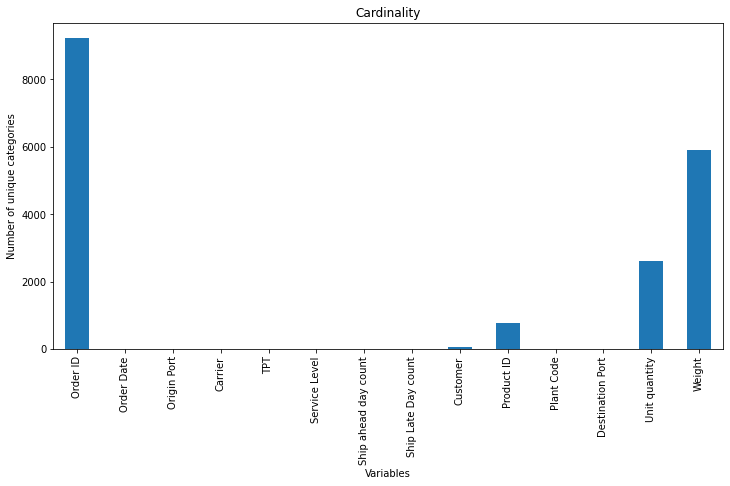

In [108]:
# plot the cardinality:

df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

PORT04    0.981118
PORT09    0.018774
PORT05    0.000109
Name: Origin Port, dtype: float64


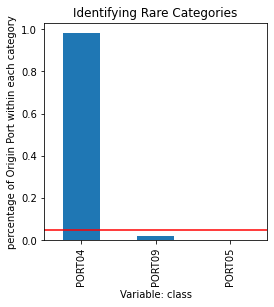

In [109]:
# Let's make a bar plot showing the frequency of each category and highlight the 5% mark with a red line:

df['Origin Port'].unique()
label_freq = df['Origin Port'].value_counts() / len(df)
print(label_freq)
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of Origin Port within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

V444_0    0.679761
V444_1    0.227564
V44_3     0.092675
Name: Carrier, dtype: float64


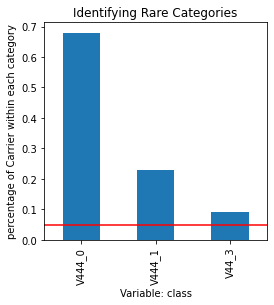

In [110]:
df['Carrier'].unique()
label_freq = df['Carrier'].value_counts() / len(df)
print(label_freq)
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of Carrier within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

DTP    0.674769
DTD    0.232556
CRF    0.092675
Name: Service Level, dtype: float64


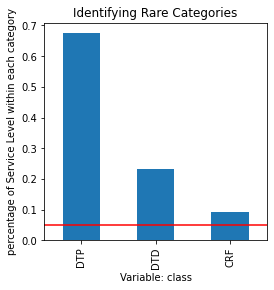

In [111]:
df['Service Level'].unique()
label_freq = df['Service Level'].value_counts() / len(df)
print(label_freq)
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of Service Level within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

V55555555555555_8         0.105914
V555555_6                 0.082691
V55555_2                  0.082257
V5555555_22               0.075203
V5555_33                  0.074986
V55555555_7               0.067065
V55555555_5               0.057623
V555555555_27             0.056538
V555555555555555_29       0.041780
V55555_4                  0.039067
V555555555_14             0.038090
V55555_26                 0.036896
V55555555_32              0.026153
V55555555555_28           0.022029
V555555555555555555_45    0.021487
V55_13                    0.019316
V5555555_30               0.017689
V555555555_3              0.015301
V55555_53                 0.015084
V555555_24                0.013565
V5555555_19               0.012805
V555555555555555555_17    0.012697
V555_15                   0.011937
V55555555_0               0.011069
V5555555_12               0.009658
V555555555555_31          0.004883
V5555_20                  0.003581
V555555555555555555_42    0.003256
V5555_36            

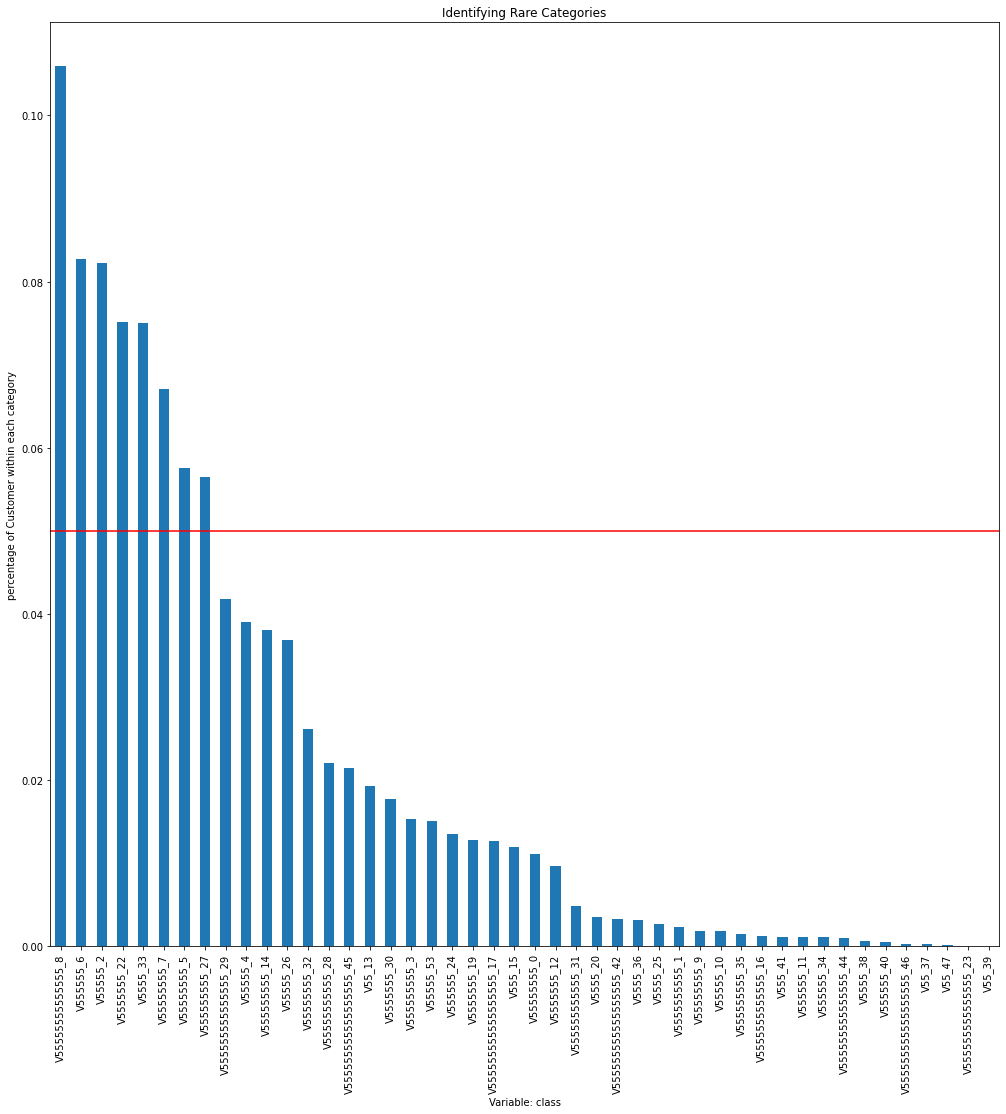

In [112]:
plt.rcParams['figure.figsize']=(17,17)

df['Customer'].unique()
label_freq = df['Customer'].value_counts() / len(df)
print(label_freq)
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of Customer within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

PLANT03    0.926858
PLANT12    0.032556
PLANT16    0.018774
PLANT08    0.011069
PLANT13    0.009333
PLANT09    0.001302
PLANT04    0.000109
Name: Plant Code, dtype: float64


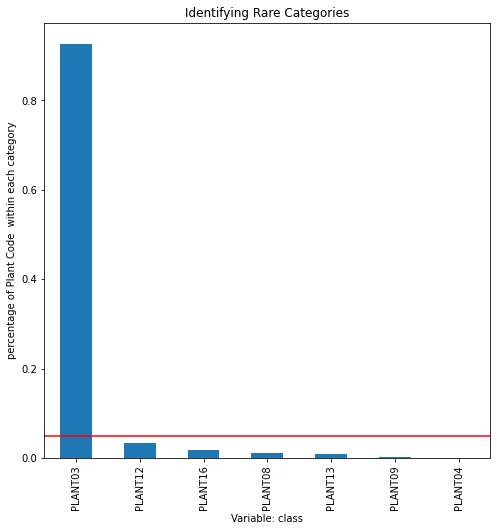

In [113]:
plt.rcParams['figure.figsize']=(8,8)

df['Plant Code'].unique()
label_freq = df['Plant Code'].value_counts() / len(df)
print(label_freq)
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of Plant Code  within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

In [114]:
# display categorical features/columns 

categorical_columns = df.select_dtypes(include=[np.object0]).columns

categorical_columns

Index(['Origin Port', 'Carrier', 'Service Level', 'Customer', 'Plant Code',
       'Destination Port'],
      dtype='object')

In [115]:
# display numerical features/columns 

numerical_columns = df.select_dtypes(include=[np.number]).columns

numerical_columns

Index(['Order ID', 'TPT', 'Ship ahead day count', 'Ship Late Day count',
       'Product ID', 'Unit quantity', 'Weight'],
      dtype='object')

In [116]:
# check summary statistics of all numerical columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,9215.0,1.447274e+09,83816.292790,1.447126e+09,1.447197e+09,1.447276e+09,1.447346e+09,1.447425e+09
TPT,9215.0,1.717743e+00,0.630500,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
Ship ahead day count,9215.0,1.852306e+00,1.922302,0.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,6.000000e+00
Ship Late Day count,9215.0,3.993489e-02,0.319625,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
Product ID,9215.0,1.680536e+06,15265.927778,1.613321e+06,1.669702e+06,1.683636e+06,1.689554e+06,1.702654e+06
Unit quantity,9215.0,3.202747e+03,15965.622260,2.350000e+02,3.300000e+02,4.770000e+02,1.275500e+03,5.618470e+05
Weight,9215.0,1.987169e+01,66.569064,0.000000e+00,1.407430e+00,4.440000e+00,1.332567e+01,2.338405e+03


In [117]:
# check for duplicate rows in the dataset

df.duplicated().sum() 

0

<AxesSubplot:>

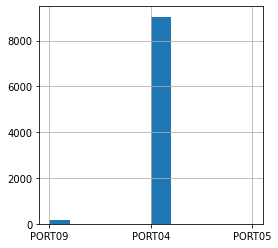

In [118]:
# Check the hist of columns
plt.rcParams['figure.figsize']=(4,4)
df['Origin Port'].hist() # matplotlib

<AxesSubplot:>

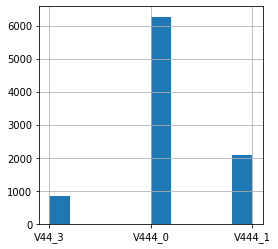

In [119]:
df['Carrier'].hist() # matplotlib 

In [120]:
# check missing values 

df.isnull().sum()

Order ID                0
Order Date              0
Origin Port             0
Carrier                 0
TPT                     0
Service Level           0
Ship ahead day count    0
Ship Late Day count     0
Customer                0
Product ID              0
Plant Code              0
Destination Port        0
Unit quantity           0
Weight                  0
dtype: int64

In [121]:
# print names or check all columns which have null values 

[val for val in df.columns if df[val].isnull().sum() > 0]

[]

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



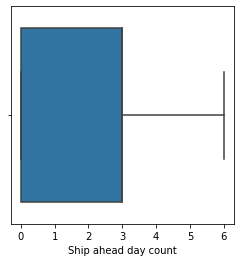

In [122]:
# Check for outliers: ->  An outlier is a data point in a dataset that is distant from all other observations.

# checking of outlier using boxplot for one numerical column called Ship ahead day count

sns.boxplot(df['Ship ahead day count'])
plt.show()

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



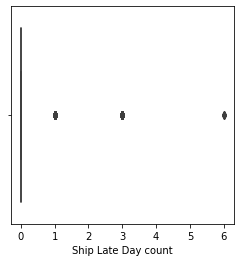

In [123]:
# checking of outlier using boxplot for one numerical column called Ship Late Day count

sns.boxplot(df['Ship Late Day count'])
plt.show()

In [124]:
# checking the  position of outlier using boxplot for one numerical column called Ship Late Day count

np.where(df['Ship Late Day count'] == 6)

(array([3747, 3787, 3899, 7054], dtype=int64),)

In [130]:
# check skewness

df.skew()

C:\Users\ACT\AppData\Local\Temp\ipykernel_11600\3520671375.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Order ID                 0.082657
TPT                     -0.389871
Ship ahead day count     0.344254
Ship Late Day count      9.862533
Product ID              -0.993632
Unit quantity           18.138895
Weight                  11.126610
dtype: float64

In [129]:
# check kurtosis

df.kurt()

C:\Users\ACT\AppData\Local\Temp\ipykernel_11600\2913706174.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Order ID                 -1.264607
TPT                       2.647441
Ship ahead day count     -1.390967
Ship Late Day count     112.804871
Product ID                1.088069
Unit quantity           460.520917
Weight                  225.882912
dtype: float64

In [131]:
# checking the correlation in the dataset

df.corr()

,Order ID,TPT,Ship ahead day count,Ship Late Day count,Product ID,Unit quantity,Weight
Order ID,1.000000,-0.045065,-0.019037,-0.025366,0.035935,0.005610,-0.018071
TPT,-0.045065,1.000000,-0.154838,0.041399,-0.242310,0.086323,-0.030720
Ship ahead day count,-0.019037,-0.154838,1.000000,-0.022371,0.019960,-0.073901,0.018590
Ship Late Day count,-0.025366,0.041399,-0.022371,1.000000,-0.055374,-0.015532,-0.017252
Product ID,0.035935,-0.242310,0.019960,-0.055374,1.000000,0.045801,0.018953
Unit quantity,0.005610,0.086323,-0.073901,-0.015532,0.045801,1.000000,0.344520
Weight,-0.018071,-0.030720,0.018590,-0.017252,0.018953,0.344520,1.000000


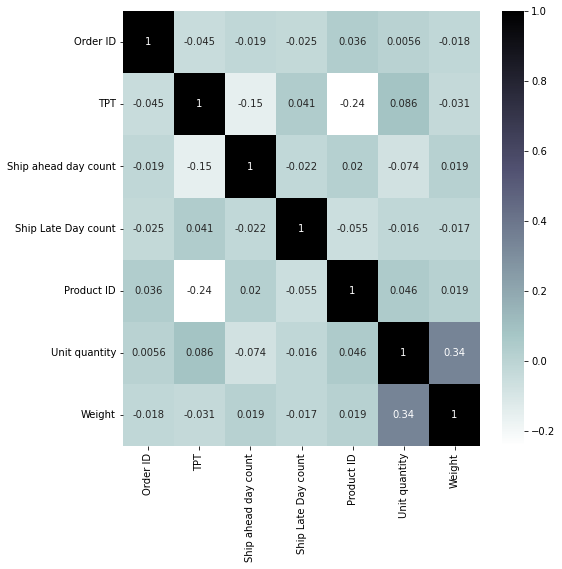

In [134]:
plt.rcParams['figure.figsize'] = (8,8)
e = df.corr()
top_correlated_features = e.index
g = sns.heatmap(df[top_correlated_features].corr(), annot=True, cmap='bone_r')

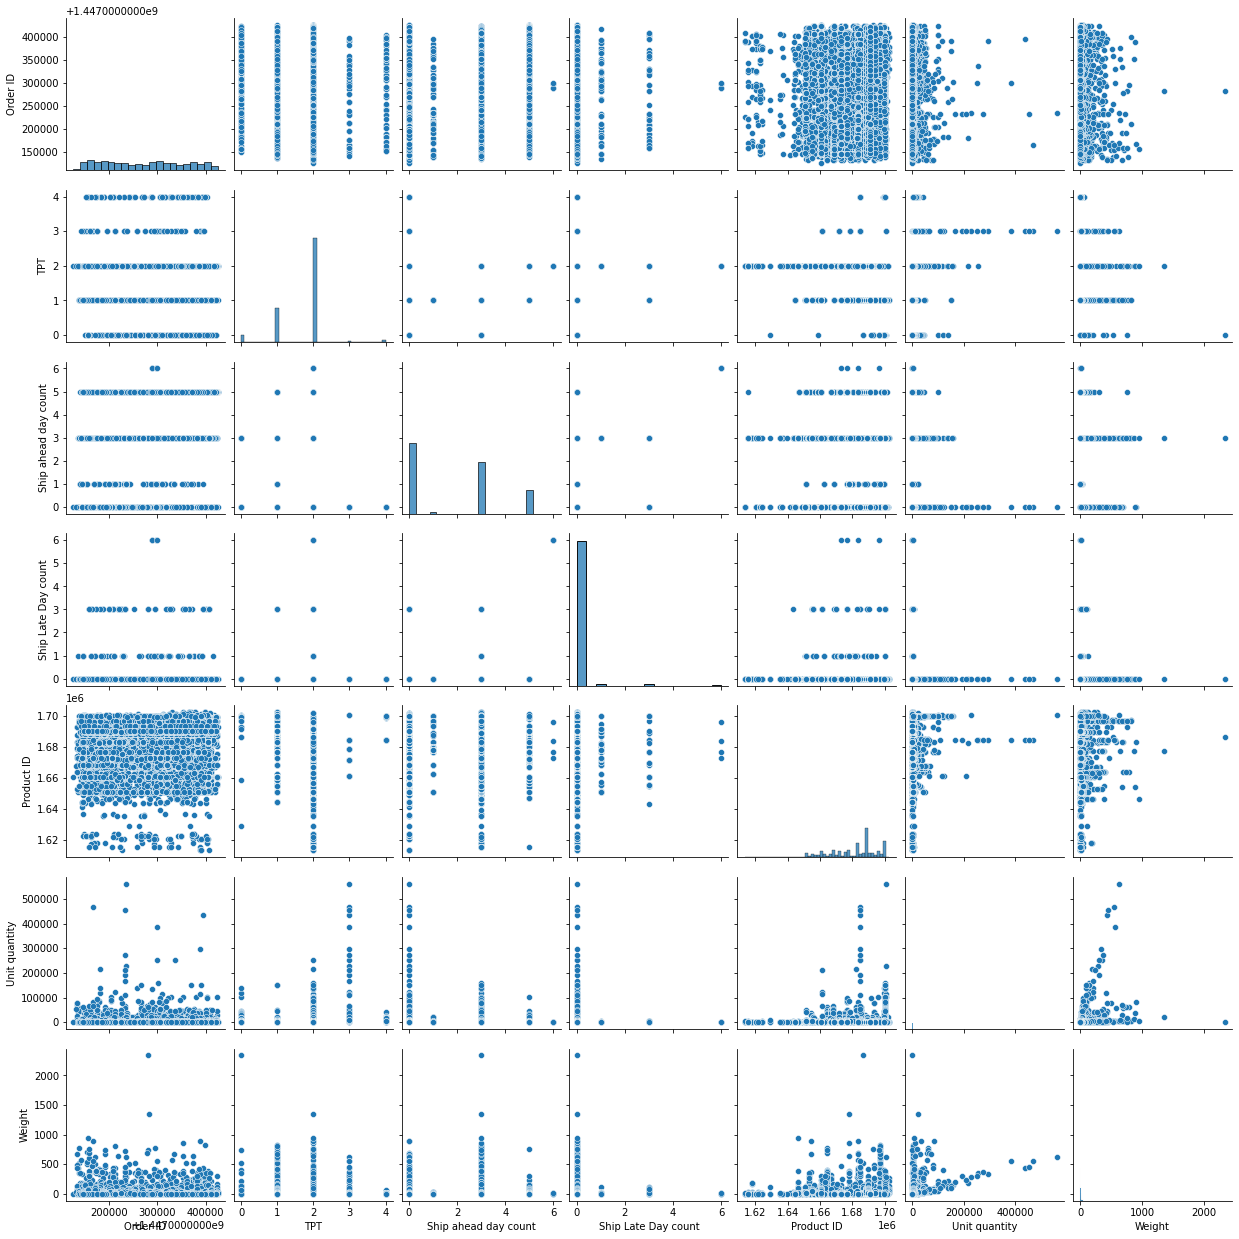

In [135]:
# pairplot of every feature in the dataset

sns.pairplot(df)
plt.show()

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Ship ahead day count', ylabel='Unit quantity'>

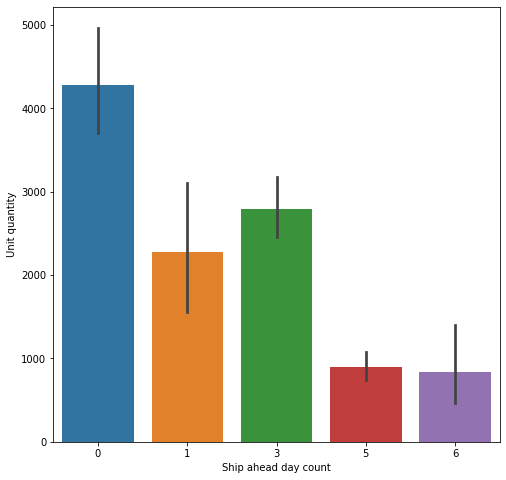

In [140]:
# visualization of ship ahead day count and Unit quantity

sns.barplot('Ship ahead day count', 'Unit quantity', data=df)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Ship Late Day count', ylabel='Unit quantity'>

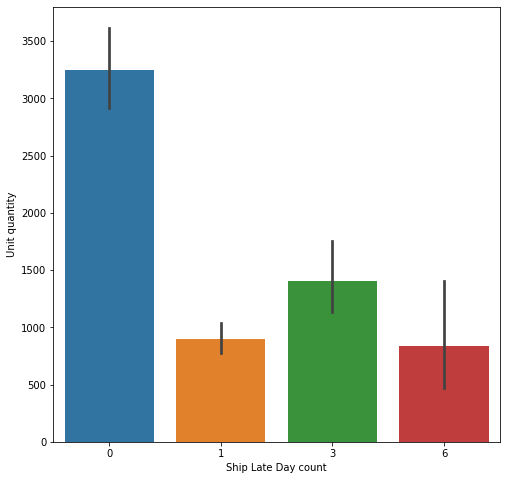

In [142]:
# visualization of ship ahead day count and Unit quantity

sns.barplot('Ship Late Day count', 'Unit quantity', data=df)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Plant Code', ylabel='Weight'>

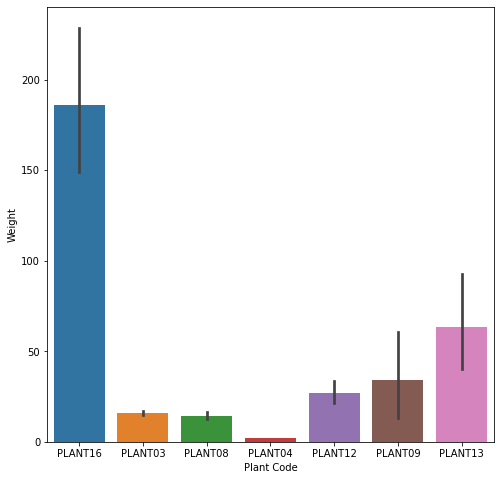

In [143]:
# visualization of ship ahead day count and Unit quantity

sns.barplot('Plant Code','Weight', data=df)

In [145]:
df.columns

Index(['Order ID', 'Order Date', 'Origin Port', 'Carrier', 'TPT',
       'Service Level', 'Ship ahead day count', 'Ship Late Day count',
       'Customer', 'Product ID', 'Plant Code', 'Destination Port',
       'Unit quantity', 'Weight'],
      dtype='object')

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Plant Code', ylabel='Ship Late Day count'>

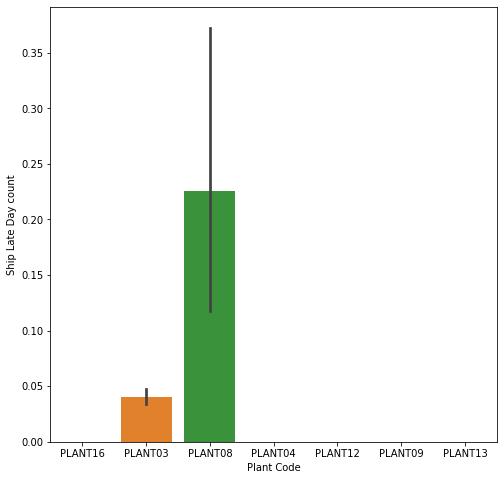

In [146]:
# visualization of ship ahead day count and Unit quantity

sns.barplot('Plant Code', 'Ship Late Day count', data=df)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Plant Code', ylabel='Ship ahead day count'>

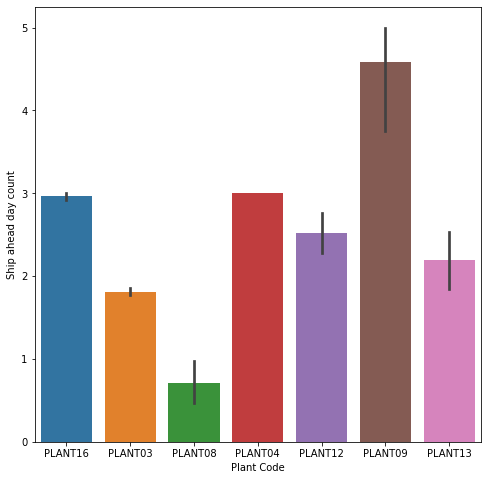

In [147]:
# visualization of ship ahead day count and Unit quantity

sns.barplot('Plant Code', 'Ship ahead day count', data=df)

In [ ]:
# lets do some EDA on the dataset

In [148]:
df.sample(n=2)

,Order ID,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
766,1.447321e+09,2013-05-26,PORT04,V44_3,0,CRF,3,0,V55555555_32,1699697,PLANT03,PORT09,10256,6.615747
4020,1.447404e+09,2013-05-26,PORT04,V444_0,2,DTP,0,0,V55555_26,1672706,PLANT03,PORT09,390,7.840000


In [149]:
# no.1 drop the Order ID column

df.drop(
    columns=['Order ID'], inplace=True
)

In [150]:
df.sample(n=3)

,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
4861,2013-05-26,PORT04,V444_0,2,DTP,0,0,V555555555_27,1690006,PLANT03,PORT09,1274,12.242680
7678,2013-05-26,PORT04,V444_1,1,DTD,0,0,V5555555_22,1656350,PLANT03,PORT09,2446,151.718131
992,2013-05-26,PORT04,V444_0,2,DTP,3,0,V55555555_5,1650404,PLANT12,PORT09,317,2.902391


In [151]:
# no.2 - Ship Late Day count

df['Ship Late Day count'].nunique() # check the total unique values

4

In [152]:
df['Ship Late Day count'].unique() # check the unique values

array([0, 6, 1, 3], dtype=int64)

In [153]:
df['Ship Late Day count'].value_counts() # check the number of unique values per item

0    9023
1     110
3      78
6       4
Name: Ship Late Day count, dtype: int64

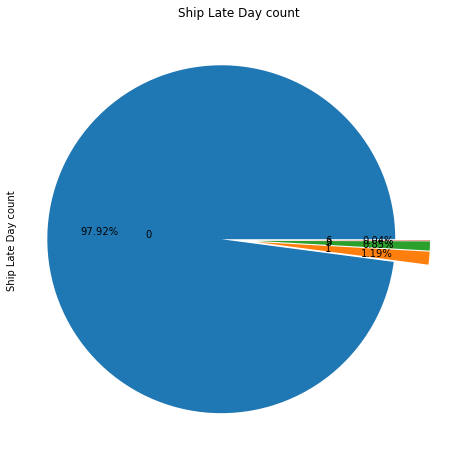

In [158]:
# visualize using a pie chart

df['Ship Late Day count'].value_counts().plot(
    kind='pie', explode=[0.1,0.1,0.1,0.1], autopct='%.2f%%', pctdistance=0.7, labeldistance=0.4, title='Ship Late Day count'
)
plt.show()

        Observation: 0 has the highest percentage of Ship Late Day count

In [160]:
# no.3 ----- Ship ahead day 

df['Ship ahead day count'].nunique() # total number of unique items

5

In [161]:
df['Ship ahead day count'].unique() # check the unique values

array([3, 0, 5, 6, 1], dtype=int64)

In [162]:
df['Ship ahead day count'].value_counts() # check the number of unique values per item

0    4426
3    3206
5    1462
1     117
6       4
Name: Ship ahead day count, dtype: int64

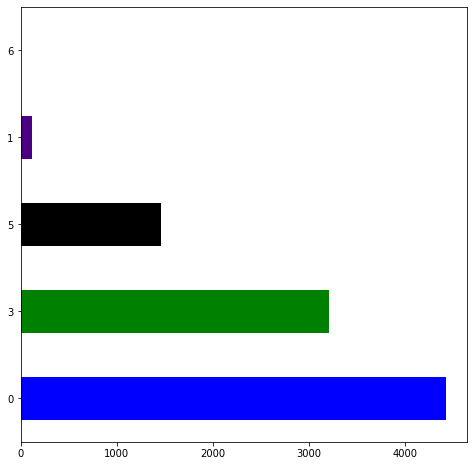

In [167]:
# visualization

df['Ship ahead day count'].value_counts().plot(
    kind='barh', color=('blue','green','black','indigo','pink')
)
plt.show()

        Observation: 0 has the highest Ship ahead day count

In [168]:
df.sample(n=2)

,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
7874,2013-05-26,PORT04,V444_1,1,DTD,0,0,V5555555_22,1699553,PLANT03,PORT09,2348,8.704295
8812,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1688629,PLANT03,PORT09,376,8.968266


In [ ]:
# n0.4 -----Plant Code

In [169]:
df['Plant Code'].nunique() # total number of unique items

7

In [170]:
df['Plant Code'].unique() # check the unique values

array(['PLANT16', 'PLANT03', 'PLANT08', 'PLANT04', 'PLANT12', 'PLANT09',
       'PLANT13'], dtype=object)

In [171]:
df['Plant Code'].value_counts() # check the number of unique values per item

PLANT03    8541
PLANT12     300
PLANT16     173
PLANT08     102
PLANT13      86
PLANT09      12
PLANT04       1
Name: Plant Code, dtype: int64

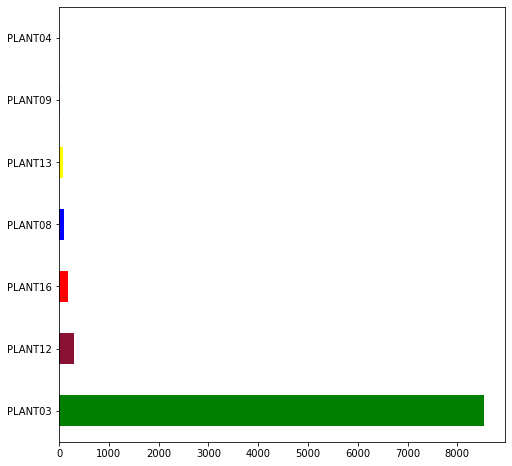

In [174]:
# visualization

df['Plant Code'].value_counts().plot(
    kind='barh', color=('green','#891234', 'red', 'blue', 'yellow', 'pink')
)

plt.show()

        Observation: Plant03 has the highest demand

In [175]:
df.sample(n=2)

,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
1283,2013-05-26,PORT04,V444_0,2,DTP,0,0,V555555555555555_29,1682757,PLANT03,PORT09,325,4.176228
1317,2013-05-26,PORT04,V444_0,2,DTP,0,0,V5555555_30,1658528,PLANT03,PORT09,1914,12.220000


In [176]:
df['Destination Port'].nunique() # total number of unique items

1

In [177]:
df['Destination Port'].unique() # check the unique values

array(['PORT09'], dtype=object)

In [ ]:
df['Destination Port'].value_counts() # check the number of unique values per item

        Observation: Destination Port PORT09 is the only one used to offload cargo

In [ ]:
# TPT

In [178]:
df.sample(n=2)

,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
2858,2013-05-26,PORT04,V444_0,2,DTP,3,0,V55555_2,1699954,PLANT03,PORT09,277,0.465733
5447,2013-05-26,PORT04,V444_0,2,DTP,0,0,V55555555555_28,1666524,PLANT03,PORT09,27738,16.178603


In [179]:
df['TPT'].nunique() # total number of unique items

5

In [180]:
df['TPT'].unique() #  check the unique values

array([1, 4, 0, 2, 3], dtype=int64)

In [181]:
df['TPT'].value_counts() #  check the number of unique values per item

2    6480
1    2123
0     411
4     143
3      58
Name: TPT, dtype: int64

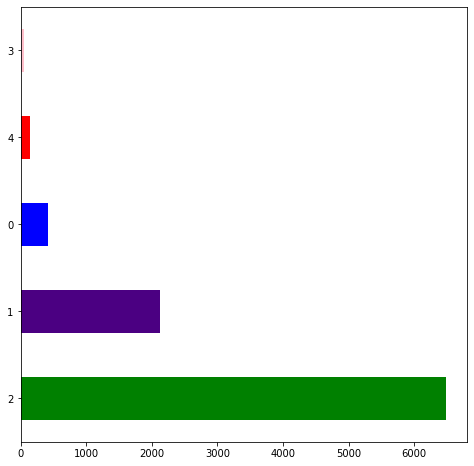

In [184]:
# visualization

df['TPT'].value_counts().plot(
    kind='barh', color=('green', 'indigo', 'blue', 'red', 'pink')
)

plt.show()

        Observation TPT 2 is high in demand

In [185]:
df.sample(n=2)

,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
208,2013-05-26,PORT04,V44_3,0,CRF,0,0,V555555555555555_29,1699418,PLANT03,PORT09,890,1.926233
8149,2013-05-26,PORT04,V444_1,1,DTD,0,0,V555555555555555555_45,1668547,PLANT03,PORT09,890,4.779859


In [186]:
df['Service Level'].nunique() # check the total number of unique items

3

In [187]:
df['Service Level'].unique() # check the unique values

array(['CRF', 'DTP', 'DTD'], dtype=object)

In [188]:
df['Service Level'].value_counts() # check the number of unique values per item

DTP    6218
DTD    2143
CRF     854
Name: Service Level, dtype: int64

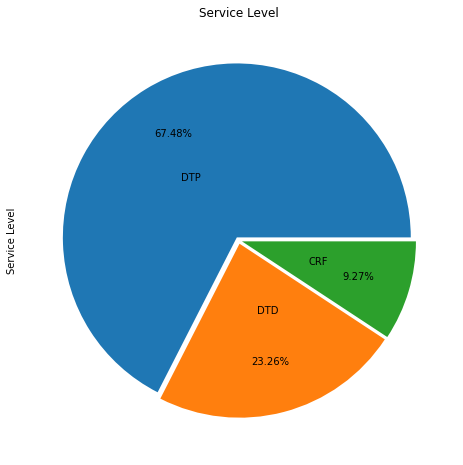

In [201]:
df['Service Level'].value_counts().plot(
    kind='pie', explode=[0.02,0.02,0.02], autopct='%.2f%%', pctdistance=0.7, labeldistance=0.4, title='Service Level'
)
plt.show()

        Observation: DTP has the highest service level

In [202]:
df.sample(n=3)

,Order Date,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
6982,2013-05-26,PORT04,V444_0,2,DTP,3,0,V55555555_5,1646393,PLANT13,PORT09,1255,195.235294
1064,2013-05-26,PORT04,V444_0,2,DTP,5,0,V55555555_7,1687353,PLANT12,PORT09,349,20.600000
2551,2013-05-26,PORT04,V444_0,2,DTP,3,0,V55555_2,1674853,PLANT03,PORT09,262,0.523798


In [206]:
# drop the order date column, we won't use it

df.drop(
    columns=['Order Date'], inplace=True
)

In [207]:
df.sample(n=2)

,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
9114,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1690621,PLANT03,PORT09,315,1.716924
3784,PORT04,V444_0,2,DTP,0,0,V555555555_14,1651299,PLANT03,PORT09,10305,26.860000


In [208]:
df['Origin Port'].nunique()

3

In [209]:
df['Origin Port'].unique()

array(['PORT09', 'PORT04', 'PORT05'], dtype=object)

In [210]:
df['Origin Port'].value_counts()

PORT04    9041
PORT09     173
PORT05       1
Name: Origin Port, dtype: int64

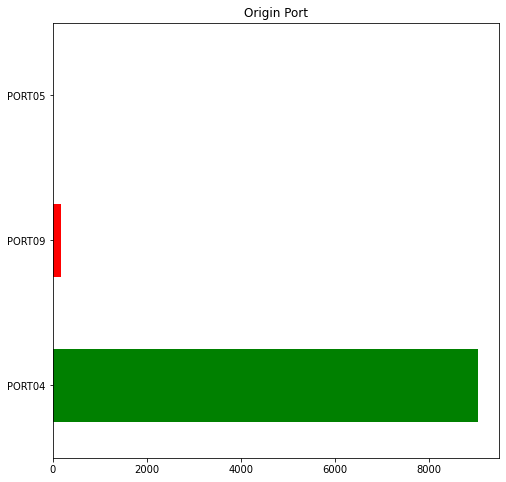

In [227]:
# visualization

df['Origin Port'].value_counts().plot(
    kind='barh', color=('green', 'red'), title='Origin Port'
)
plt.show()

        Observation: PORT04 has the highest onloading of cargo

In [228]:
df.sample(n=2)

,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
3478,PORT04,V444_0,2,DTP,0,0,V55555_4,1656246,PLANT03,PORT09,1244,4.096306
4364,PORT04,V444_0,2,DTP,3,0,V55555555_5,1696075,PLANT03,PORT09,1323,5.828514


In [229]:
df['Carrier'].nunique()

3

In [230]:
df['Carrier'].unique()

array(['V44_3', 'V444_0', 'V444_1'], dtype=object)

In [231]:
df['Carrier'].value_counts()

V444_0    6264
V444_1    2097
V44_3      854
Name: Carrier, dtype: int64

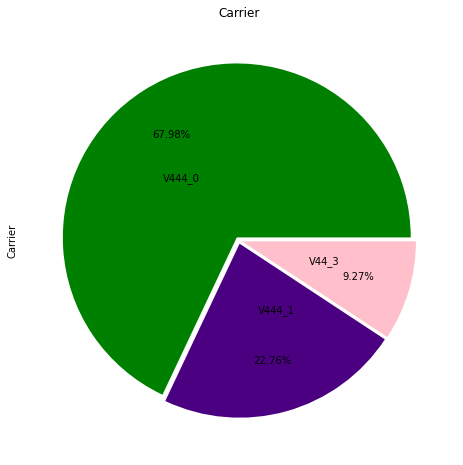

In [235]:
df['Carrier'].value_counts().plot(
    kind='pie', explode=[0.02,0.02,0.02], autopct='%.2f%%', colors=('green','indigo','pink'), pctdistance=0.7, labeldistance=0.4,title='Carrier'
)
plt.show()

In [236]:
df.sample(n=2)

,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Customer,Product ID,Plant Code,Destination Port,Unit quantity,Weight
8920,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1690619,PLANT03,PORT09,283,0.482263
6420,PORT04,V444_0,2,DTP,5,0,V55555555_7,1689548,PLANT03,PORT09,312,3.575030


In [240]:
# drop Customer column

df.drop(
    columns=['Customer'], inplace=True
)

            More on Exploratory Data Analysis

In [241]:
df.sample(n=2)

,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Product ID,Plant Code,Destination Port,Unit quantity,Weight
7273,PORT04,V444_1,1,DTD,1,0,1696073,PLANT03,PORT09,540,1.946388
193,PORT04,V44_3,4,CRF,0,0,1699327,PLANT03,PORT09,926,2.697478


In [247]:
df.groupby(['TPT'	,'Service Level'], as_index=False).size().sort_values(by='size', ascending=False)

,TPT,Service Level,size
6,2,DTP,6156
3,1,DTD,1984
0,0,CRF,377
4,2,CRF,195
9,4,CRF,143
2,1,CRF,139
5,2,DTD,129
1,0,DTP,34
7,3,DTD,30
8,3,DTP,28


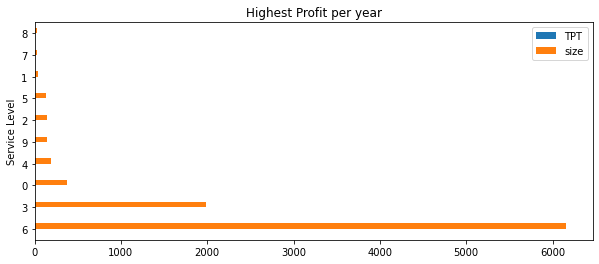

In [252]:
df.groupby(['TPT','Service Level'], as_index=False).size().sort_values(by='size', ascending=False).plot(
    kind='barh',
    figsize=(10,4),
    title='Highest Profit per year',
    xlabel='Service Level',
)

plt.show()

        Observation: TPT 6 has highest service level 

In [253]:
df.sample(n=2)

,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Product ID,Plant Code,Destination Port,Unit quantity,Weight
205,PORT04,V44_3,4,CRF,0,0,1699416,PLANT03,PORT09,2682,7.881128
1523,PORT04,V444_0,2,DTP,3,0,1676566,PLANT03,PORT09,490,2.518890


In [257]:
df.groupby(['Carrier','TPT'], as_index=False).size().sort_values(by='size', ascending=False)

,Carrier,TPT,size
1,V444_0,2,6172
3,V444_1,1,1984
5,V44_3,0,377
7,V44_3,2,195
8,V44_3,4,143
6,V44_3,1,139
4,V444_1,2,113
2,V444_0,3,58
0,V444_0,0,34


                Observation: V444_0 has higher size

                            - A lot more can be done on EDA to generate insights on the data

        Preparing data for machine learning
                - This is a supervised machine learning where we predict the weight

In [262]:
df.sample(n=2)

,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Product ID,Plant Code,Destination Port,Unit quantity,Weight
697,PORT04,V44_3,0,CRF,3,0,1699419,PLANT03,PORT09,5066,13.154861
7876,PORT04,V444_1,1,DTD,0,0,1699553,PLANT03,PORT09,1075,3.481718


In [263]:
# convert categorical columns to values the machine can understand

In [266]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Origin Port'] = label_encoder.fit_transform(df['Origin Port'])
df['Carrier'] = label_encoder.fit_transform(df['Carrier'])
df['Service Level'] = label_encoder.fit_transform(df['Service Level'])
df['Plant Code'] = label_encoder.fit_transform(df['Plant Code'])
df['Destination Port'] = label_encoder.fit_transform(df['Destination Port'])

In [267]:
df.sample(n=2)

,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Product ID,Plant Code,Destination Port,Unit quantity,Weight
4242,0,0,2,2,0,0,1677884,0,0,1793,7.280000
5190,0,0,2,2,0,3,1688824,0,0,402,2.111871


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Origin Port           9215 non-null   int32  
 1   Carrier               9215 non-null   int32  
 2   TPT                   9215 non-null   int64  
 3   Service Level         9215 non-null   int32  
 4   Ship ahead day count  9215 non-null   int64  
 5   Ship Late Day count   9215 non-null   int64  
 6   Product ID            9215 non-null   int64  
 7   Plant Code            9215 non-null   int32  
 8   Destination Port      9215 non-null   int32  
 9   Unit quantity         9215 non-null   int64  
 10  Weight                9215 non-null   float64
dtypes: float64(1), int32(5), int64(5)
memory usage: 612.1 KB


In [277]:
df.drop(
    'Product ID', axis=1, inplace=True
)

In [278]:
df.sample(n=2)

,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Plant Code,Destination Port,Unit quantity,Weight
6045,0,0,2,2,3,0,0,0,1062,7.580000
1708,0,0,2,2,0,0,0,0,276,1.705635


In [279]:
X = df.iloc[:,:-1]
X.head()

,Origin Port,Carrier,TPT,Service Level,Ship ahead day count,Ship Late Day count,Plant Code,Destination Port,Unit quantity
0,2,2,1,0,3,0,6,0,808
1,2,2,1,0,3,0,6,0,3188
2,2,2,1,0,3,0,6,0,2331
3,2,2,1,0,3,0,6,0,847
4,2,2,1,0,3,0,6,0,2163


In [286]:
y = df.iloc[:,-1]
y.head()

0    14.30
1    87.94
2    61.20
3    16.16
4    52.34
Name: Weight, dtype: float64

In [287]:
# split the dataset into X and y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.23
)

In [290]:
X_train.shape

(7095, 9)

In [292]:
y_test.shape

(2120,)

In [293]:
# Check the feature importances

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [294]:
print(model.feature_importances_)

[0.11990487 0.0079256  0.00671134 0.01545632 0.04113819 0.00098338
 0.03394275 0.         0.77393754]


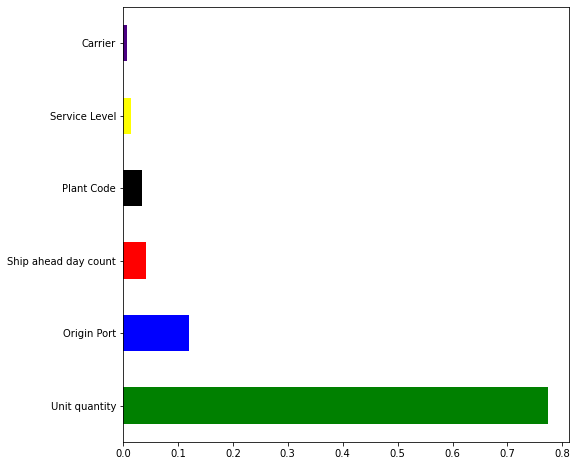

In [298]:
# plot the graph of feature importances for better visualizations

f_importances = pd.Series(model.feature_importances_, index=X.columns)
f_importances.nlargest(6).plot(
    kind='barh',
    color=('green', 'blue', 'red', 'black', 'yellow', 'indigo')
)
plt.show()

        lets use random forests and ensembling

        1)

In [301]:
from sklearn.ensemble import RandomForestRegressor

rgr = RandomForestRegressor(n_jobs=1)
rgr.fit(X_train, y_train)

RandomForestRegressor(n_jobs=1)

In [302]:
# predict

y_test_pred = rgr.predict(X_test)

In [303]:
# evaluate accuracy

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(
    'R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_test, y_test_pred)) # RMSE
    )
)

R2: 0.33, MSE: 2526.94, RMSE: 13.29, MAE 50.27


In [ ]:
# performed poorly at 33%

# lets increase the score

        2)

In [306]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [309]:
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf 
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [313]:
# use randomizedcv

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rgr = RandomForestRegressor()
rf = RandomizedSearchCV(
    estimator=rgr,
    param_distributions=random_grid,
    scoring='neg_mean_squared_error',
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1
)

In [314]:
rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [316]:
y_test_pred = rf.predict(X_test)

c:\Users\ACT\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Weight', ylabel='Density'>

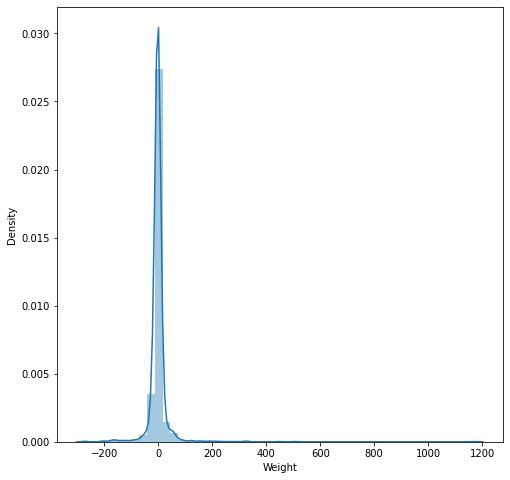

In [317]:
sns.distplot(y_test - y_test_pred)

In [318]:
# evaluate accuracy

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(
    'R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_test, y_test_pred)) # RMSE
    )
)

R2: 0.51, MSE: 1844.40, RMSE: 13.13, MAE 42.95


        we now have a 51% accuracy

        lets use gradient boosting

In [319]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [320]:
# Create a parameter distribution for the gradient boosting trees:

param_dist = {'max_features' : ['log2',1.0],
            'max_depth' : [3, 5, 7, 10],
            'min_samples_leaf' : [2, 3, 5, 10],
            'n_estimators': [50, 100],
            'learning_rate' : [0.0001,0.001,0.01,0.05,0.1,0.3],
            'loss' : ['ls','huber']
}

In [343]:
# Run the grid search to find the best parameters. Perform a randomized search with 30 iterations:

pre_gs_inst = RandomizedSearchCV(GradientBoostingRegressor(warm_start=True),
                param_distributions = random_grid, cv=3, 
                n_iter = 30, n_jobs=-1)

pre_gs_inst.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(warm_start=True),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]})

In [344]:
y_test_pred = rf.predict(X_test)

In [345]:
# evaluate accuracy

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(
    'R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_test, y_test_pred)) # RMSE
    )
)

R2: 0.51, MSE: 1844.40, RMSE: 13.13, MAE 42.95


        we still get a 51%